# Roller Coaster

#### Overview

This project is slightly different than others you have encountered thus far. Instead of a step-by-step tutorial, this project contains a series of open-ended requirements which describe the project you'll be building. There are many possible ways to correctly fulfill these requirements, and you should expect to use the internet, Codecademy, and other resources when you encounter a problem that you cannot easily solve.

#### Project Goals

You will work to create several data visualizations that will give you insight into the world of roller coasters.

## Prerequisites

In order to complete this project, you should have completed the first two lessons in the [Data Analysis with Pandas Course](https://www.codecademy.com/learn/data-processing-pandas) and the first two lessons in the [Data Visualization in Python course](https://www.codecademy.com/learn/data-visualization-python). This content is also covered in the [Data Scientist Career Path](https://www.codecademy.com/learn/paths/data-science/).

## Project Requirements

1. Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

   Roller coasters are often split into two main categories based on their construction material: **wood** or **steel**. Rankings for the best wood and steel roller coasters from the 2013 to 2018 [Golden Ticket Awards](http://goldenticketawards.com) are provded in `'Golden_Ticket_Award_Winners_Wood.csv'` and `'Golden_Ticket_Award_Winners_Steel.csv'`, respectively. Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [2]:
# 1 
# Import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
# load rankings data
wood_rankings = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
# load rankings data
steel_rankings = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

# view first 5 rows of data
wood_rankings.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013


In [4]:
# called in separate cell and without print function as I prefer the readability of the table without the print function
# within a Jupyter Notebook
steel_rankings.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


2. Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster's name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

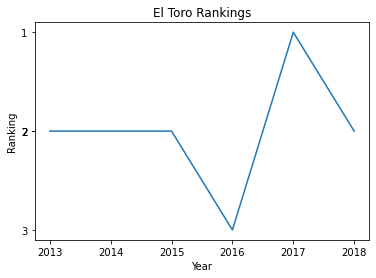

<Figure size 432x288 with 0 Axes>

In [33]:
# 2
# Create a function to plot rankings over time for 1 roller coaster
def plot_ranking_wood(name, park):
    fig, ax = plt.subplots()
    plt.plot(wood_rankings['Year of Rank'][(wood_rankings.Name == name) & (wood_rankings.Park == park)], wood_rankings.Rank[(wood_rankings.Name == name) & (wood_rankings.Park == park)])
    plt.title(name + ' Rankings')
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    ax.set_yticks(wood_rankings.Rank[(wood_rankings.Name == name) & (wood_rankings.Park == park)])
    ax.invert_yaxis()
    plt.show()
    plt.clf()
    
def plot_ranking_steel(name, park):
    fig, ax = plt.subplots()
    plt.plot(wood_rankings['Year of Rank'][(steel_rankings.Name == name) & (steel_rankings.Park == park)], steel_rankings.Rank[(steel_rankings.Name == name) & (steel_rankings.Park == park)])
    plt.title(name + ' Rankings')
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    ax.set_yticks(steel_rankings.Rank[(steel_rankings.Name == name) & (steel_rankings.Park == park)])
    ax.invert_yaxis()
    plt.show()
    plt.clf()
    
# Create a plot of El Toro ranking over time
plot_ranking_wood('El Toro', 'Six Flags Great Adventure')

# the issue was that there was more than one El Toro roller coaster, causing two different roller coasters to be charted.
# the issue was fixed by adding the additional check of the park location

3. Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters' names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as one roller coaster name, `"Boulder Dash"` as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

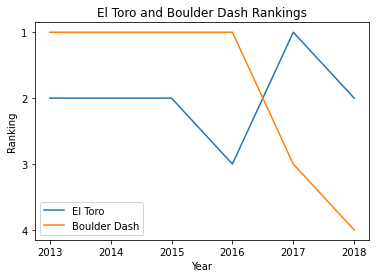

<Figure size 432x288 with 0 Axes>

In [82]:
# 3
# Create a function to plot rankings over time for 2 roller coasters
def plot_2ranking_wood(name1, park1, name2, park2):
    first_rankings = wood_rankings.Rank[(wood_rankings.Name == name1) & (wood_rankings.Park == park1)]
    second_rankings = wood_rankings.Rank[(wood_rankings.Name == name2) & (wood_rankings.Park == park2)]
    first_years = wood_rankings['Year of Rank'][(wood_rankings.Name == name1) & (wood_rankings.Park == park1)]
    second_years = wood_rankings['Year of Rank'][(wood_rankings.Name == name2) & (wood_rankings.Park == park2)]
    if max(second_rankings.unique()) > max(first_rankings.unique()):
        mr = max(second_rankings.unique())
    else:
        mr = max(first_rankings.unique())
    ytick = range(1,(mr+1))
    fig, ax = plt.subplots()
    plt.plot(first_years, first_rankings)
    plt.plot(second_years, second_rankings)
    plt.title(name1 + ' and ' + name2 + ' Rankings')
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.legend([name1, name2])
    ax.set_yticks(ytick)
    ax.invert_yaxis()
    plt.show()
    plt.clf()
    

# Create a plot of El Toro and Boulder Dash roller coasters
plot_2ranking_wood('El Toro', 'Six Flags Great Adventure', 'Boulder Dash', 'Lake Compounce')

4. Write a function that will plot the ranking of the top `n` ranked roller coasters over time as lines. Your function should take a number `n` and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   For example, if `n == 5`, your function should plot a line for each roller coaster that has a rank of `5` or lower.
   
   Call your function with a value of `n` and either the wood ranking or steel ranking DataFrame.

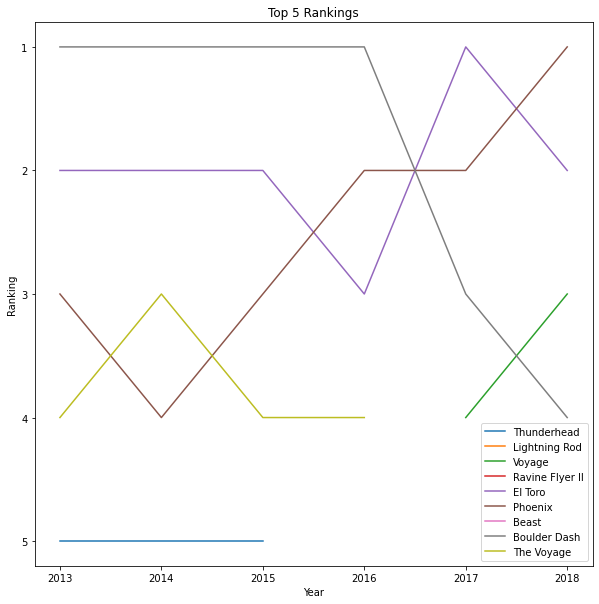

<Figure size 432x288 with 0 Axes>

In [126]:
# 4
# Create a function to plot top n rankings over time
def plot_n_ranking(ranking_df, n):
    n_rankings = ranking_df[ranking_df.Rank <= n]
    n_years = n_rankings['Year of Rank']
    ytick = range(1,(n+1))
    fig, ax = plt.subplots(figsize=[10,10])
    unique_coaster = set(n_rankings.Name.unique())
    for coaster in unique_coaster:
        ax.plot(n_rankings['Year of Rank'][n_rankings.Name == coaster], n_rankings.Rank[n_rankings.Name == coaster], label = coaster)
    plt.title('Top ' + str(n) + ' Rankings')
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.legend(loc=4)
    ax.set_yticks(ytick)
    ax.invert_yaxis()
    plt.show()
    plt.clf()
    
    
# Create a plot of top n rankings over time
plot_n_ranking(wood_rankings, 5)

5. Now that you've visualized rankings over time, let's dive into the actual statistics of roller coasters themselves. [Captain Coaster](https://captaincoaster.com/en/) is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [127]:
# 5
# load roller coaster data
roller_coasters = pd.read_csv('roller_coasters.csv')
roller_coasters.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


6. Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and one of the column names.

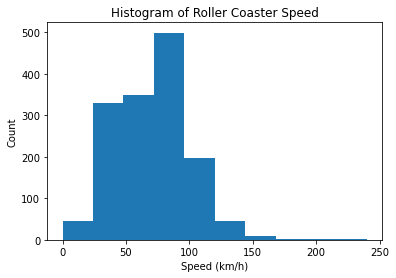

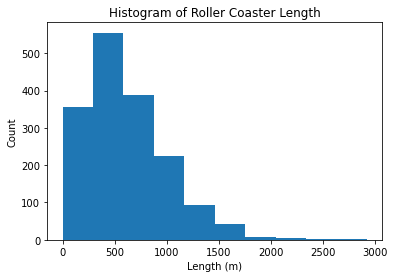

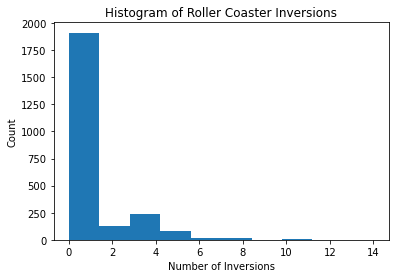

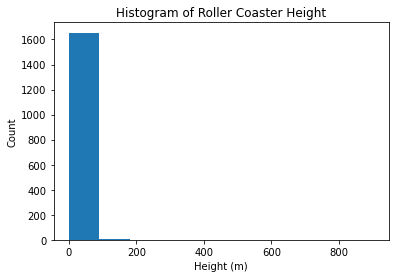

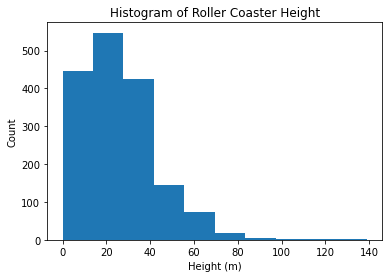

<Figure size 432x288 with 0 Axes>

In [144]:
# 6
# Create a function to plot histogram of column values
def roller_histogram(df, column):
    plt.hist(column)
    plt.ylabel('Count')

# Create histogram of roller coaster speed
roller_histogram(roller_coasters, roller_coasters.speed)
plt.xlabel('Speed (km/h)')
plt.title('Histogram of Roller Coaster Speed')
plt.show()
plt.clf()
# Create histogram of roller coaster length
roller_histogram(roller_coasters, roller_coasters.length)
plt.xlabel('Length (m)')
plt.title('Histogram of Roller Coaster Length')
plt.show()
plt.clf()

# Create histogram of roller coaster number of inversions
roller_histogram(roller_coasters, roller_coasters.num_inversions)
plt.xlabel('Number of Inversions')
plt.title('Histogram of Roller Coaster Inversions')
plt.show()
plt.clf()

# Create a function to plot histogram of height values
# first called it with old function, this histogram shows the far right skew of data of an outlier that has placed nearly all
# of out data in the first bin. In order to improve the function we will remove the outliers and re-plot
roller_histogram(roller_coasters, roller_coasters.height)
plt.xlabel('Height (m)')
plt.title('Histogram of Roller Coaster Height')
plt.show()
plt.clf()

# new function
def roller_height_histogram(df, column):
    non_outlier = column[column < 140]
    plt.hist(non_outlier)
    plt.ylabel('Count')
    plt.title("Histogram of Roller Coaster Height")
    plt.xlabel('Height (m)')
    plt.show()
    plt.clf()

# Create a histogram of roller coaster height
roller_height_histogram(roller_coasters, roller_coasters.height)

7. Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and amusement park name.

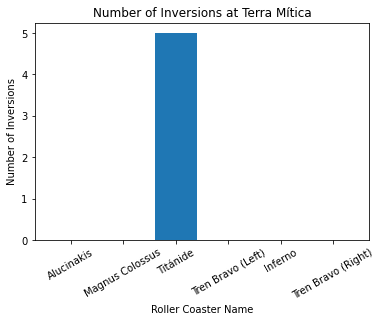

<Figure size 432x288 with 0 Axes>

In [159]:
# 7
# Create a function to plot inversions by coaster at park
def barplot_coasters(df, park_name):
    coasters = (df[df.park == park_name])
    plt.bar(coasters.name, coasters.num_inversions)
    plt.title('Number of Inversions at ' + park_name)
    plt.xlabel('Roller Coaster Name')
    plt.xticks(rotation = 30)
    plt.ylabel('Number of Inversions')
    plt.show()
    plt.clf()
# Create barplot of inversions by roller coasters
barplot_coasters(roller_coasters, 'Terra Mítica')


8. Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame.

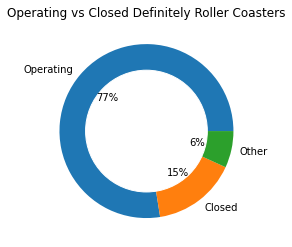

<Figure size 432x288 with 0 Axes>

In [191]:
# 8
# Create a function to plot a pie chart of status.operating
def pie_coasters_status(df, column):
    status_values = df[column].value_counts()
    status_value = [status_values[0], status_values[1]]
    other_value = sum(status_values) - status_values[0] - status_values[1]
    status_value.append(other_value)
    statuses = ['Operating', 'Closed', 'Other']
    plt.pie(status_value, labels = statuses, autopct = '%0.1d%%')
    plt.title('Operating vs Closed Definitely Roller Coasters')
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()
    plt.clf()
# Create pie chart of roller coasters
pie_coasters_status(roller_coasters, 'status')

9. `.scatter()` is another useful function in matplotlib that you might not have seen before. `.scatter()` produces a scatter plot, which is similar to `.plot()` in that it plots points on a figure. `.scatter()`, however, does not connect the points with a line. This allows you to analyze the relationship between two variables. Find [`.scatter()`'s documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

   Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.
   
   Call your function with the roller coaster DataFrame and two-column names.

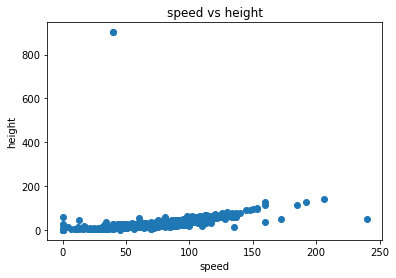

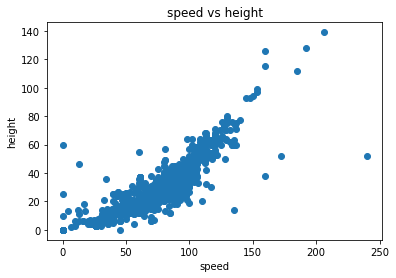

<Figure size 432x288 with 0 Axes>

In [190]:
# 9
# Create a function to plot scatter of any two columns
def scatter_coaster(df, column1, column2):
    plt.scatter(df[column1], df[column2])
    plt.title(column1 + ' vs ' + column2)
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()
    plt.clf()
scatter_coaster(roller_coasters, 'speed', 'height')
# Create a function to plot scatter of speed vs height
# above plot is good for in general plotting, but as previously found, the height column has a large outlier that
# makes the plot less than useful. below we customize for the height outlier
def scatter_coaster_height_speed(df, column1, column2):
    non_outlier_height = df[column2][df[column2] < 140]
    non_outlier_speed = df[column1][df[column2] < 140]
    plt.scatter(non_outlier_speed, non_outlier_height)
    plt.title(column1 + ' vs ' + column2)
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()
    plt.clf()

# Create a scatter plot of roller coaster height by speed
scatter_coaster_height_speed(roller_coasters, 'speed', 'height')

10. Part of the fun of data analysis and visualization is digging into the data you have and answering questions that come to your mind.

    Some questions you might want to answer with the datasets provided include:
    - What roller coaster seating type is most popular? And do different seating types result in higher/faster/longer roller coasters?
    - Do roller coaster manufactures have any specialties (do they focus on speed, height, seating type, or inversions)?
    - Do amusement parks have any specialties?
    
    What visualizations can you create that answer these questions, and any others that come to you? Share the questions you ask and the accompanying visualizations you create on the Codecademy forums.

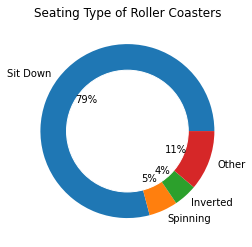

<Figure size 432x288 with 0 Axes>

In [201]:
# What roller coaster seating type is most popular? 
seating_status_values = roller_coasters.seating_type.value_counts()
seating_status_value = [seating_status_values[0], seating_status_values[1], seating_status_values[2]]
other_value = sum(seating_status_values) - seating_status_values[0] - seating_status_values[1] - seating_status_values[2]
seating_status_value.append(other_value)
seating_labels = ['Sit Down', 'Spinning', 'Inverted', 'Other']
plt.pie(seating_status_value, labels = seating_labels, autopct = '%0.1d%%')
plt.title('Seating Type of Roller Coasters')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
plt.clf()


In [213]:
# Create average order by month dataframe
avg_coaster = roller_coasters.groupby('seating_type').speed.mean().reset_index().dropna()
# Inspect avg_order dataframe
avg_coaster

,seating_type,speed
0,4th Dimension,67.352941
1,Alpine,38.333333
2,Bobsleigh,54.111111
3,Floorless,98.208333
4,Flying,70.125000
5,Inverted,80.054545
6,Motorbike,71.400000
7,Pipeline,70.666667
8,Sit Down,69.758865
9,Spinning,50.060606


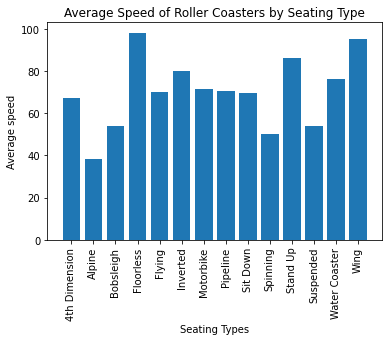

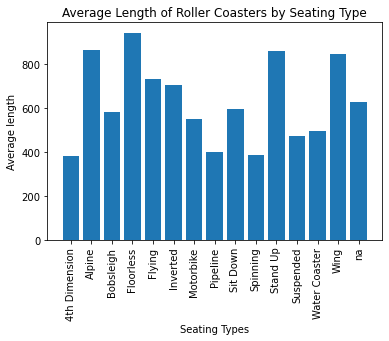

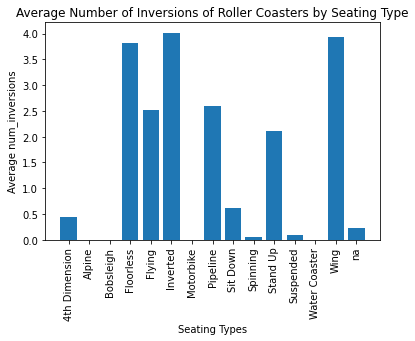

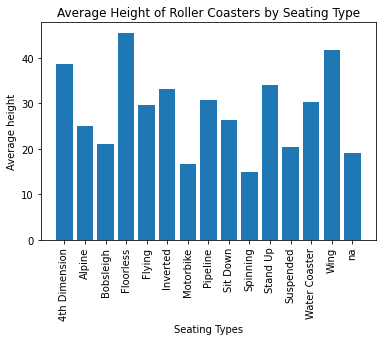

<Figure size 432x288 with 0 Axes>

In [247]:
# And do different seating types result in higher/faster/longer roller coasters?



# Create function to plot bar graphs while grouping by seat types
def roller_bar_grouping(df, column):
    avg_coaster = roller_coasters.groupby('seating_type')[column].mean().reset_index().dropna()
    plt.bar(avg_coaster.seating_type, avg_coaster[column])
    ax = plt.subplot()
    ax.set_xticks(range(len(avg_coaster.seating_type)))
    ax.set_xticklabels(avg_coaster.seating_type,rotation=90)
    plt.ylabel('Average ' + column)
    plt.xlabel('Seating Types')

# Create bar graph of roller coaster speed
roller_bar_grouping(roller_coasters, 'speed')
plt.title('Average Speed of Roller Coasters by Seating Type')
plt.show()
plt.clf()

# Create bar graph of roller coaster length
roller_bar_grouping(roller_coasters, 'length')
plt.title('Average Length of Roller Coasters by Seating Type')
plt.show()
plt.clf()

# Create bar graph of roller coaster number of inversions
roller_bar_grouping(roller_coasters, 'num_inversions')
plt.title('Average Number of Inversions of Roller Coasters by Seating Type')
plt.show()
plt.clf()

# Create bar graph of roller coaster height
roller_bar_grouping(roller_coasters, 'height')
plt.title('Average Height of Roller Coasters by Seating Type')
plt.show()
plt.clf()


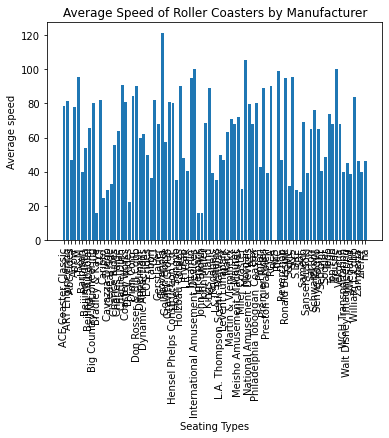

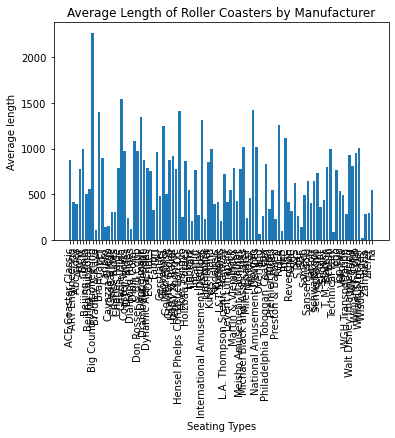

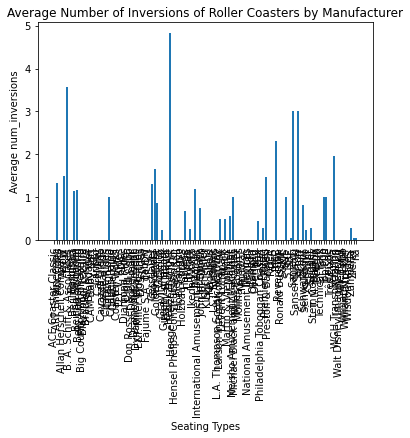

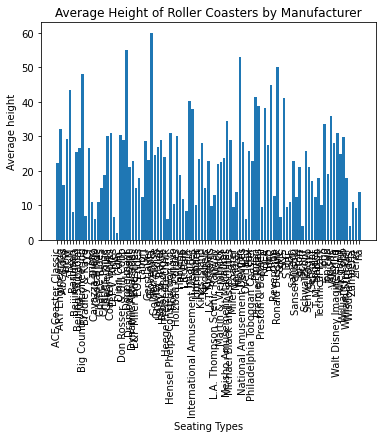

<Figure size 432x288 with 0 Axes>

In [255]:
# Do roller coaster manufactures have any specialties (do they focus on speed, height, seating type, or inversions)?
# Do amusement parks have any specialties?

# Create function to plot bar graphs while grouping by manufacturers
def roller_bar_mgrouping(df, column):
    avg_coaster = roller_coasters.groupby('manufacturer')[column].mean().reset_index().dropna()
    plt.bar(avg_coaster.manufacturer, avg_coaster[column])
    ax = plt.subplot()
    ax.set_xticks(range(len(avg_coaster.manufacturer)))
    ax.set_xticklabels(avg_coaster.manufacturer,rotation=90)
    plt.ylabel('Average ' + column)
    plt.xlabel('Seating Types')

# Create bar graph of roller coaster speed
roller_bar_mgrouping(roller_coasters, 'speed')
plt.title('Average Speed of Roller Coasters by Manufacturer')
plt.show()
plt.clf()

# Create bar graph of roller coaster length
roller_bar_mgrouping(roller_coasters, 'length')
plt.title('Average Length of Roller Coasters by Manufacturer')
plt.show()
plt.clf()

# Create bar graph of roller coaster number of inversions
roller_bar_mgrouping(roller_coasters, 'num_inversions')
plt.title('Average Number of Inversions of Roller Coasters by Manufacturer')
plt.show()
plt.clf()

# Create bar graph of roller coaster height
roller_bar_mgrouping(roller_coasters, 'height')
plt.title('Average Height of Roller Coasters by Manufacturer')
plt.show()
plt.clf()


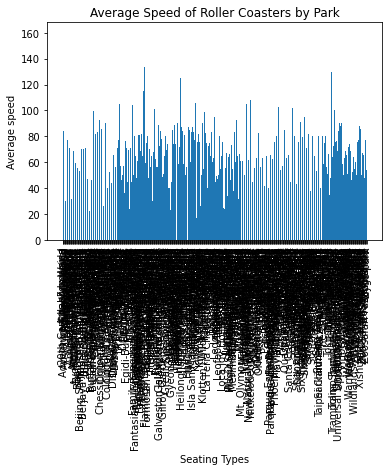

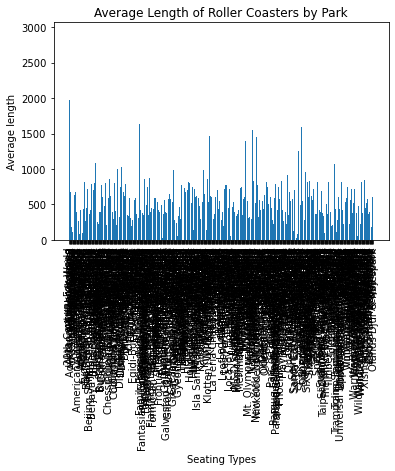

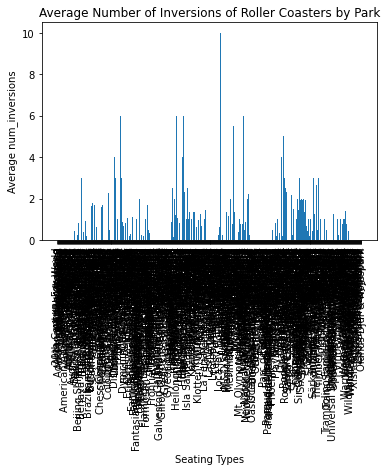

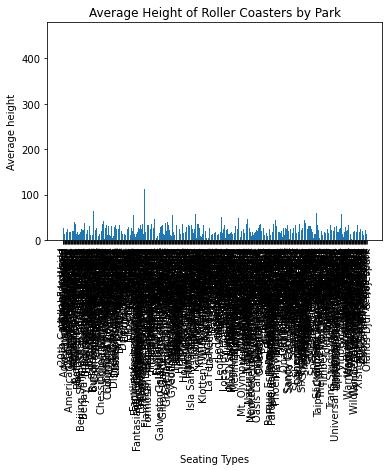

<Figure size 432x288 with 0 Axes>

In [256]:
# Do amusement parks have any specialties?

# Create function to plot bar graphs while grouping by amusement park
def roller_bar_pgrouping(df, column):
    avg_coaster = roller_coasters.groupby('park')[column].mean().reset_index().dropna()
    plt.bar(avg_coaster.park, avg_coaster[column])
    ax = plt.subplot()
    ax.set_xticks(range(len(avg_coaster.park)))
    ax.set_xticklabels(avg_coaster.park,rotation=90)
    plt.ylabel('Average ' + column)
    plt.xlabel('Seating Types')

# Create bar graph of roller coaster speed
roller_bar_pgrouping(roller_coasters, 'speed')
plt.title('Average Speed of Roller Coasters by Park')
plt.show()
plt.clf()

# Create bar graph of roller coaster length
roller_bar_pgrouping(roller_coasters, 'length')
plt.title('Average Length of Roller Coasters by Park')
plt.show()
plt.clf()

# Create bar graph of roller coaster number of inversions
roller_bar_pgrouping(roller_coasters, 'num_inversions')
plt.title('Average Number of Inversions of Roller Coasters by Park')
plt.show()
plt.clf()

# Create bar graph of roller coaster height
roller_bar_pgrouping(roller_coasters, 'height')
plt.title('Average Height of Roller Coasters by Park')
plt.show()
plt.clf()


## Solution

Great work! Visit [our forums](https://discuss.codecademy.com/t/roller-coaster-challenge-project-python-pandas/462378) or the file **Roller Coaster_Solution.ipynb** to compare your project to our sample solution code. You can also learn how to host your own solution on GitHub so you can share it with other learners! Your solution might look different from ours, and that's okay! There are multiple ways to solve these projects, and you'll learn more by seeing others' code.

In [192]:
roller_coasters.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating
